### Human Activity Recognisation Dataset
- for any queries, write to myself.drb@gmail.com

Human Activity Recognition - HAR - has emerged as a key research area in the last years and is gaining increasing attention by the pervasive computing research community, especially for the development of context-aware systems. There are many potential applications for HAR, like: elderly monitoring, life log systems for monitoring energy expenditure and for supporting weight-loss programs, and digital assistants for weight lifting exercises.

Read more: http://groupware.les.inf.puc-rio.br/har#sbia_paper_section#ixzz6UErkPbbb

In [ ]:
# Python Solution 
# Import packages
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [ ]:
# Import data
training = pd.read_csv("har_train.csv")
test =  pd.read_csv("har_validate.csv")

In [ ]:
training.shape

(13737, 53)

In [ ]:
test.shape

(5885, 53)

In [ ]:
training.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,...,13737.000000,13737.000000,13737.00000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000,13737.000000
mean,64.503131,0.191794,-10.941653,11.317973,-0.004831,0.040013,-0.130328,-5.424620,30.152362,-72.748271,...,34.717551,0.159878,0.06067,0.142131,-61.736915,163.438087,-55.328383,-311.819611,379.741210,391.859212
std,62.768030,22.363296,95.374331,7.744534,0.206729,0.078435,0.241559,29.697752,28.560242,100.410466,...,10.089365,0.629520,2.15904,0.601628,180.263200,200.714691,138.501162,346.766862,511.403542,370.396450
min,-28.900000,-54.900000,-180.000000,0.000000,-1.040000,-0.640000,-1.350000,-120.000000,-69.000000,-269.000000,...,0.000000,-3.360000,-7.02000,-8.090000,-498.000000,-585.000000,-410.000000,-1280.000000,-892.000000,-973.000000
25%,1.100000,1.670000,-88.300000,3.000000,-0.030000,0.000000,-0.200000,-21.000000,3.000000,-162.000000,...,29.000000,-0.220000,-1.46000,-0.180000,-178.000000,54.000000,-182.000000,-613.000000,-3.000000,187.000000
50%,114.000000,5.260000,-12.700000,17.000000,0.030000,0.020000,-0.100000,-15.000000,35.000000,-152.000000,...,36.000000,0.050000,0.03000,0.080000,-57.000000,200.000000,-39.000000,-378.000000,595.000000,509.000000
75%,123.000000,14.800000,13.600000,18.000000,0.110000,0.110000,-0.020000,-5.000000,61.000000,27.000000,...,41.000000,0.560000,1.64000,0.490000,76.000000,312.000000,26.000000,-72.000000,737.000000,652.000000
max,162.000000,60.300000,179.000000,28.000000,2.220000,0.640000,1.620000,83.000000,164.000000,105.000000,...,73.000000,3.520000,6.13000,4.310000,477.000000,589.000000,291.000000,666.000000,1480.000000,1090.000000


In [ ]:
test.describe()

,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,accel_belt_z,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
count,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,...,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000,5885.000000
mean,64.183263,0.570192,-11.819918,11.300085,-0.007370,0.038595,-0.131028,-5.991674,30.160748,-72.232625,...,34.710110,0.153455,0.109031,0.172520,-61.453186,164.164316,-55.206797,-314.341206,380.992333,397.709245
std,62.713506,22.322734,94.776716,7.737757,0.208729,0.077766,0.240786,29.519482,28.621288,100.538973,...,9.978388,0.691182,4.601868,3.069053,181.377979,198.774834,138.165097,347.428437,504.646070,366.621586
min,-28.600000,-55.800000,-179.000000,1.000000,-0.980000,-0.450000,-1.460000,-81.000000,-38.000000,-275.000000,...,0.000000,-22.000000,-6.620000,-6.990000,-496.000000,-632.000000,-446.000000,-1280.000000,-896.000000,-960.000000
25%,1.080000,1.930000,-88.300000,3.000000,-0.030000,0.000000,-0.200000,-21.000000,3.000000,-162.000000,...,29.000000,-0.220000,-1.490000,-0.180000,-178.000000,63.000000,-181.000000,-623.000000,17.000000,197.000000
50%,113.000000,5.360000,-14.300000,17.000000,0.030000,0.020000,-0.100000,-15.000000,35.000000,-152.000000,...,36.000000,0.050000,0.030000,0.070000,-57.000000,202.000000,-43.000000,-380.000000,579.000000,517.000000
75%,123.000000,15.300000,7.390000,18.000000,0.110000,0.110000,-0.020000,-5.000000,61.000000,28.000000,...,41.000000,0.560000,1.610000,0.480000,78.000000,312.000000,26.000000,-78.000000,736.000000,656.000000
max,162.000000,60.100000,179.000000,29.000000,2.020000,0.630000,1.440000,85.000000,149.000000,104.000000,...,108.000000,3.970000,311.000000,231.000000,365.000000,923.000000,254.000000,672.000000,1450.000000,1050.000000


In [ ]:
training.tail(50)

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
13687,E,1.26,6.85,-91.6,1,0.16,-0.02,-0.39,-10,5,...,44,0.27,2.68,1.21,-33,401,-165,-447,750,683
13688,E,0.00,6.94,-91.7,1,0.11,-0.03,-0.38,-8,4,...,44,0.58,1.88,1.03,-23,391,-175,-366,749,608
13689,E,-1.93,6.76,-91.9,2,0.03,-0.03,-0.41,-12,-1,...,49,0.21,0.03,0.16,-61,435,-199,-314,752,548
13690,E,-3.10,6.54,-91.9,2,-0.03,-0.02,-0.56,-16,8,...,46,-0.06,-1.20,-0.21,-54,406,-197,-335,751,551
13691,E,-5.52,5.90,-91.9,3,-0.10,-0.02,-0.52,-19,3,...,50,-0.13,-2.79,-0.71,-23,455,-181,-455,726,602
13692,E,-5.88,5.77,-91.9,3,-0.14,-0.03,-0.52,-16,0,...,49,-0.14,-3.26,-0.74,-36,442,-177,-495,703,619
13693,E,-7.09,4.63,-92.1,4,-0.19,-0.05,-0.16,-11,1,...,43,0.31,-4.62,-0.80,-55,375,-175,-657,543,641
13694,E,-7.08,3.63,-92.1,4,-0.06,-0.02,-0.13,-6,-2,...,35,-0.16,-5.17,-1.21,-104,250,-205,-676,165,552
13695,E,-7.01,3.54,-92.1,4,0.02,-0.02,-0.13,-9,4,...,28,-0.43,-4.99,-1.54,-97,148,-207,-601,-35,485
13696,E,-5.10,4.02,-92.7,4,0.16,0.03,0.02,-17,9,...,43,-0.13,-1.38,-0.49,-117,360,-186,-475,708,568


In [ ]:
test.head(15)

,classe,roll_belt,pitch_belt,yaw_belt,total_accel_belt,gyros_belt_x,gyros_belt_y,gyros_belt_z,accel_belt_x,accel_belt_y,...,total_accel_forearm,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z
0,A,1.48,8.07,-94.4,3,0.02,0.02,-0.02,-21,2,...,36,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0
1,A,1.45,8.17,-94.4,3,0.03,0.00,0.00,-21,4,...,36,0.02,0.00,-0.02,190,205,-215,-22,656.0,473.0
2,A,1.42,8.21,-94.4,3,0.02,0.00,-0.02,-22,4,...,36,0.00,-0.02,-0.03,193,202,-214,-14,659.0,478.0
3,A,1.48,8.15,-94.4,3,0.00,0.00,0.00,-21,4,...,36,0.02,0.00,0.00,194,204,-215,-13,656.0,471.0
4,A,1.51,8.12,-94.4,3,0.00,0.00,-0.02,-21,4,...,36,0.02,-0.02,0.00,192,204,-213,-13,653.0,481.0
5,A,1.55,8.08,-94.4,3,0.00,0.02,0.00,-21,5,...,36,0.02,0.00,-0.02,192,206,-216,-16,653.0,472.0
6,A,1.60,8.10,-94.4,3,0.02,0.00,-0.02,-20,1,...,36,0.03,-0.03,-0.02,194,208,-214,-11,654.0,469.0
7,A,1.57,8.09,-94.4,3,0.02,0.02,-0.02,-21,3,...,36,0.02,-0.03,-0.02,191,206,-213,-17,654.0,478.0
8,A,1.44,8.19,-94.4,3,0.02,0.00,-0.03,-21,5,...,36,0.00,0.00,0.00,192,206,-216,-19,653.0,466.0
9,A,1.43,8.17,-94.4,3,0.00,0.00,-0.03,-22,4,...,36,0.00,-0.02,-0.02,196,207,-216,-15,650.0,473.0


In [ ]:
training['classe'].unique()

array(['A', 'B', 'C', 'D', 'E'], dtype=object)

In [ ]:
# Create the X and Y
xtrain = training.drop('classe', axis=1)
ytrain = training.loc[:, 'classe']

xtest = test.drop('classe', axis=1)
ytest = test.loc[:, 'classe']

In [ ]:
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predict Output 
pred = model.predict(xtest)
print(pred[:150])

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'D' 'D' 'E' 'E' 'E' 'E'
 'D' 'C' 'C' 'C' 'D' 'C' 'D' 'D' 'D' 'D' 'D' 'E' 'E' 'E' 'E' 'E' 'E' 'D'
 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'C' 'C' 'C' 'C' 'D' 'D' 'D' 'D' 'D' 'D'
 'D' 'D' 'D' 'D' 'D' 'D']


[]

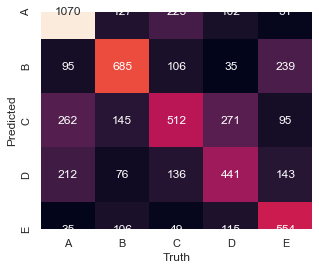

In [ ]:
# Plot Confusion Matrix
#plt.figure(figsize=(10,8))
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.plot()

In [ ]:
# Importing the dependancies
from sklearn import metrics
# Predicted values
y_pred = pred
# Actual values
y_act = ytest
# Printing the confusion matrix
# The columns will show the instances predicted for each label,
# and the rows will show the actual number of instances for each label.
print(metrics.confusion_matrix(pred, ytest, labels=["A", "B", "C","D","E"]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(pred, ytest, labels=["A", "B", "C","D","E"]))

[[1070  127  223  102   51]
 [  95  685  106   35  239]
 [ 262  145  512  271   95]
 [ 212   76  136  441  143]
 [  35  106   49  115  554]]
              precision    recall  f1-score   support

           A       0.64      0.68      0.66      1573
           B       0.60      0.59      0.60      1160
           C       0.50      0.40      0.44      1285
           D       0.46      0.44      0.45      1008
           E       0.51      0.64      0.57       859

    accuracy                           0.55      5885
   macro avg       0.54      0.55      0.54      5885
weighted avg       0.55      0.55      0.55      5885

